
## Linear least squares regression with L2 regualarization

### Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

### Importing the dataset

Importing the dataset and checking the first 5 and last 5 values

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,x1,x2,x3,y
0,-1.254599,-1.147857,22.195982,86.778544
1,0.986585,-3.531944,20.467984,85.330567
2,-4.419164,-1.401472,21.803345,79.702687
3,2.080726,-3.938247,22.909730,99.196104
4,3.324426,-3.362983,20.545475,93.340813


In [ ]:
df.tail()

,x1,x2,x3,y
145,2.009691,-3.781711,22.465580,97.200242
146,2.062422,-3.755954,20.254513,87.737733
147,4.866396,-2.877188,21.111926,98.950833
148,3.127996,-1.158254,22.958003,95.608140
149,2.533782,-2.871221,20.250502,87.484425


### Checking the column datatypes if they have any null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      150 non-null    float64
 1   x2      150 non-null    float64
 2   x3      150 non-null    float64
 3   y       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Checking the descriptive statistics of our data

In [ ]:
df.describe()

,x1,x2,x3,y
count,150.000000,150.000000,150.000000,150.000000
mean,0.016191,-2.445622,21.400449,84.792015
std,2.919217,0.902315,0.887900,8.548512
min,-4.944779,-3.984815,20.020856,62.577302
25%,-2.546847,-3.156506,20.596866,79.736031
50%,0.152674,-2.419603,21.450037,84.783885
75%,2.542517,-1.683997,22.117693,91.869961
max,4.905051,-1.043049,22.958003,103.468835


### Checking correlation between columns

In [ ]:
df.corr()

,x1,x2,x3,y
x1,1.000000,0.050499,-0.059034,0.876457
x2,0.050499,1.000000,0.013112,0.082739
x3,-0.059034,0.013112,1.000000,0.325764
y,0.876457,0.082739,0.325764,1.000000


> Here, we can see that the dependent variable `y` has a strong correlation with our independent variable `x1`

### Visualizing the dataset

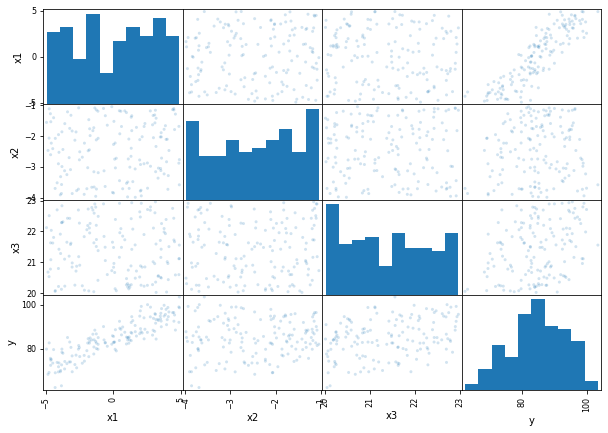

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10,7))
plt.show()

> Here, we can again see there is a strong correlation between `y` and `x1`

### Getting the independent and dependent variables from the dataset

As stated in the problem, x1,x2 and x3 and the independent variables and the fourth column y is our dependent variable.

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Checking the first 5 rows of X
X[:5]

,x1,x2,x3
0,-1.254599,-1.147857,22.195982
1,0.986585,-3.531944,20.467984
2,-4.419164,-1.401472,21.803345
3,2.080726,-3.938247,22.909730
4,3.324426,-3.362983,20.545475


In [ ]:
# Checking the first 5 rows of y
y[:5]

0    86.778544
1    85.330567
2    79.702687
3    99.196104
4    93.340813
Name: y, dtype: float64

### Creating train and test splits

We will use the 80% data for training and 20% for testing our model

In [ ]:
# Size of independent and dependent variables
len(X), len(y)

(150, 150)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, # 20% of testing
                                                    random_state=42, # To get same results everytime
                                                    )
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

### Normalizing our independent variables

> Ridge models require normalization because the penalty coefficients are the same for all the variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std[:5], X_test_std[:5]

(array([[-1.234658  ,  0.94297545, -1.30509484],
        [ 0.5503601 , -0.71884846,  0.21597582],
        [-0.52186179,  0.68466096,  1.50326094],
        [ 1.53035529,  1.49671263,  1.20038026],
        [ 1.08248803,  1.14129418, -1.53588745]]),
 array([[ 1.18929057,  0.45310756,  0.38067722],
        [ 0.329209  ,  1.34845606, -1.25749501],
        [-1.47542922,  0.40162981, -1.46910914],
        [-1.04876779,  0.67279047, -0.60101948],
        [ 1.33584036,  0.36340963,  1.15399523]]))

### Finding the best value of alpha

> We can find the best value for the **L2** penalty **alpha** using the `RidgeCV` class from sklearn as it has built-in cross-validation.

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline

In [ ]:
# Range of alpha values for cross validation
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2]

> Normalizing the independent variables within a pipeline during `RidgeCV` to **prevent data leakage**.

In [ ]:
cvmodel = RidgeCV(alphas)

# Creating pipeline for scaling data with RidgeCV
pipeline = Pipeline([('transformer', sc), ('estimator', cvmodel)])

pipeline.fit(X_train, y_train)

# Get the best value for aplha
cvmodel.alpha_

0.5

### Creating model and fitting our data

In [ ]:
model = Ridge(alpha=0.5)
model.fit(X_train_std, y_train)

Ridge(alpha=0.5)

In [ ]:
# Checking the coefficients 
model.coef_

array([7.61618705, 0.15878839, 3.12136662])

In [ ]:
# Getting the coefficient of determination on unseen data
r2 = model.score(X_test_std, y_test)
print(f'Coefficient of determination: {r2}')

Coefficient of determination: 0.9249036631299241


The coefficient of determination, or R2, is a significant indicator that shows the proportion of variance in the dependent variable that is explained by a set of independent factors in a linear regression. Thus, it shows how well the estimated model can predict. The **best possible score** is **1** and our model has a score of **0.92** which shows that using the predictors that are currently available `(X_test)`, we can account for up to **92%** of the variation in the response variable `(y_test)`.

### Making predictions with our model

In [ ]:
y_pred = model.predict(X_test_std)

### Evaluating our model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error: 5.742083449821547
Mean Absolute Error: 1.8032222778879141
